In [1]:
from IPython.display import Markdown as md

### change to reflect your notebook
_nb_loc = "03_image_models/diagrams.ipynb"
_nb_title = "Diagrams"

### no need to change any of this
_nb_safeloc = _nb_loc.replace('/', '%2F')
md("""
<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://console.cloud.google.com/ai-platform/notebooks/deploy-notebook?name={1}&url=https%3A%2F%2Fgithub.com%2FGoogleCloudPlatform%2Fpractical-ml-vision-book%2Fblob%2Fmaster%2F{2}&download_url=https%3A%2F%2Fgithub.com%2FGoogleCloudPlatform%2Fpractical-ml-vision-book%2Fraw%2Fmaster%2F{2}">
    <img src="https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/logo-cloud.png"/> Run in AI Platform Notebook</a>
  </td>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/GoogleCloudPlatform/practical-ml-vision-book/blob/master/{0}">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/GoogleCloudPlatform/practical-ml-vision-book/blob/master/{0}">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/{0}">
    <img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>
""".format(_nb_loc, _nb_title, _nb_safeloc))


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://console.cloud.google.com/ai-platform/notebooks/deploy-notebook?name=Diagrams&url=https%3A%2F%2Fgithub.com%2FGoogleCloudPlatform%2Fpractical-ml-vision-book%2Fblob%2Fmaster%2F03_image_models%2Fdiagrams.ipynb&download_url=https%3A%2F%2Fgithub.com%2FGoogleCloudPlatform%2Fpractical-ml-vision-book%2Fraw%2Fmaster%2F03_image_models%2Fdiagrams.ipynb">
    <img src="https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/logo-cloud.png"/> Run in AI Platform Notebook</a>
  </td>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/GoogleCloudPlatform/practical-ml-vision-book/blob/master/03_image_models/diagrams.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/GoogleCloudPlatform/practical-ml-vision-book/blob/master/03_image_models/diagrams.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/03_image_models/diagrams.ipynb">
    <img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>


# Diagrams for Ch 3 sidebars


## Enable GPU and set up helper functions

This notebook and pretty much every other notebook in this repository
will run faster if you are using a GPU.
On Colab:
- Navigate to Edit→Notebook Settings
- Select GPU from the Hardware Accelerator drop-down

On Cloud AI Platform Notebooks:
- Navigate to https://console.cloud.google.com/ai-platform/notebooks
- Create an instance with a GPU or select your instance and add a GPU

Next, we'll confirm that we can connect to the GPU with tensorflow:

In [ ]:
import tensorflow as tf
print(tf.version.VERSION)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

2.3.0
Found GPU at: /device:GPU:0


In [40]:
%pip install -q -U tensorflow-addons

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3

def read_and_decode(filename):
  # Read the file
  img = tf.io.read_file(filename)
  # Convert the compressed string to a 3D uint8 tensor.
  img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # Resize the image to the desired size.
  return tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])

In [2]:
!gsutil cat gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/eval_set.csv | head -10

gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/sunflowers/14646281372_5f13794b47.jpg,sunflowers
gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/sunflowers/1022552002_2b93faf9e7_n.jpg,sunflowers
gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/sunflowers/50987813_7484bfbcdf.jpg,sunflowers
gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/sunflowers/21995435890_e5672244a4_m.jpg,sunflowers
gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/tulips/14124669683_7fb74f20c3.jpg,tulips
gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/daisy/7133935763_82b17c8e1b_n.jpg,daisy
gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/daisy/9489270024_1b05f08492_m.jpg,daisy
gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/daisy/3611577717_f3a7a8c416_n.jpg,daisy
gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/roses/4504731519_9a260b6607_n.jpg,roses
gs://practical-ml-vision-bo

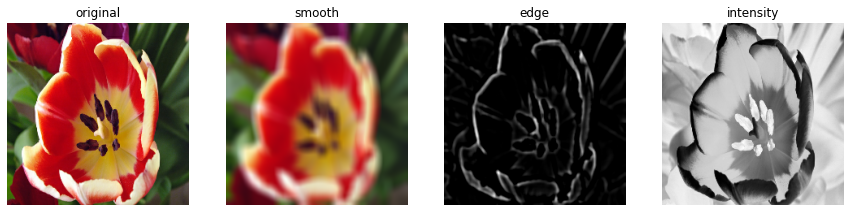

In [25]:
img = read_and_decode('gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/tulips/14124669683_7fb74f20c3.jpg')

f, ax = plt.subplots(1, 4, figsize=(15,5))

ax[0].imshow(img.numpy())
ax[0].set_title('original')
ax[0].axis('off')

mean = tfa.image.mean_filter2d(img, filter_shape=11)
ax[1].imshow(mean.numpy())
ax[1].set_title('smooth')
ax[1].axis('off')

edge = tf.clip_by_value(tf.image.rgb_to_grayscale(
    tfa.image.mean_filter2d(img, filter_shape=5) - tfa.image.mean_filter2d(img, filter_shape=11)
), 0, 1)
ax[2].imshow(edge.numpy(), cmap='gray')
ax[2].set_title('edge')
ax[2].axis('off')

bw_img = 1.0 - tf.image.rgb_to_grayscale(img)
ax[3].imshow(bw_img.numpy(), cmap='gray')
ax[3].set_title('intensity')
ax[3].axis('off');

## License
Copyright 2020 Google Inc. Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0 Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.